<a href="https://colab.research.google.com/github/Karthik-nova/Fraud_detection/blob/master/Keras_attempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
!ls "/content/drive/My Drive/"

 Abstract.gsheet
 Abstract.xlsx
 Abstract.xlsx.gsheet
 Akhi_1_BDay
 Aksharath_Delivery
'Colab Notebooks'
'Copy of DS C47 IIITB upGrad Program Calendar.gsheet'
'Copy of Income Tax Computation.gsheet'
 Datascience
 DataScience_Cheatsheet_1676260892.pdf
 dating_1677093495.pdf
'Handpicked personal.zip'
 iPhone
 Karthik_Aadhar.pdf
 Karthik_Photo.jpg
'Karthik_Ramadass_Data Scientist.pdf'
'Logistics regression implementation.ipynb'
'New House_ceremony'
'Provisional & Consolidated.zip'
'SCHEME PLAN.pdf'
'SCHEME PLAN REV-1.pdf'
 Test
 UK-2017-20


In [4]:
!pip install -q keras

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
%matplotlib inline

In [7]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [8]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [9]:
data = pd.read_csv('train.csv')
X_test = pd.read_csv("test.csv")

In [10]:
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
data_y = data['label'].values
data_x = data.drop('label',axis=1)

In [12]:
data_x.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


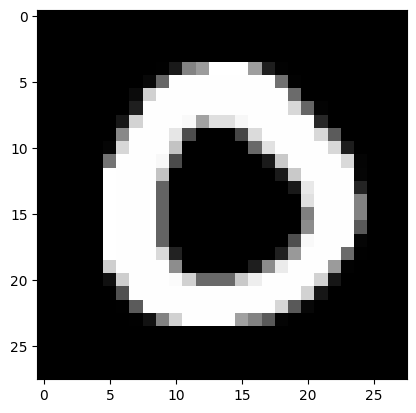

In [14]:
img = data_x.iloc[4].values.reshape((28,28))
plt.imshow(img,cmap='gray')

In [15]:
set(data_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [16]:
X_train, X_val, y_train, y_val = train_test_split(data_x, data_y, test_size = 0.1, random_state=42)

In [17]:
model = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(784,)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)])

In [18]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(X_train, y_train, batch_size=64, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
591/591 [==============================] - 9s 5ms/step - loss: 1.6866 - accuracy: 0.8456 - val_loss: 0.4486 - val_accuracy: 0.9060
Epoch 2/5
591/591 [==============================] - 3s 5ms/step - loss: 0.3079 - accuracy: 0.9280 - val_loss: 0.2810 - val_accuracy: 0.9302
Epoch 3/5
591/591 [==============================] - 3s 5ms/step - loss: 0.1918 - accuracy: 0.9490 - val_loss: 0.2575 - val_accuracy: 0.9364
Epoch 4/5
591/591 [==============================] - 2s 4ms/step - loss: 0.1561 - accuracy: 0.9569 - val_loss: 0.2519 - val_accuracy: 0.9421
Epoch 5/5
591/591 [==============================] - 2s 4ms/step - loss: 0.1337 - accuracy: 0.9633 - val_loss: 0.2128 - val_accuracy: 0.9512


In [20]:
model.predict(X_test).argmax(axis=1)

875/875 [==============================] - 2s 2ms/step


array([2, 0, 9, ..., 3, 9, 2])

875/875 [==============================] - 2s 2ms/step
The predicted label is: 0


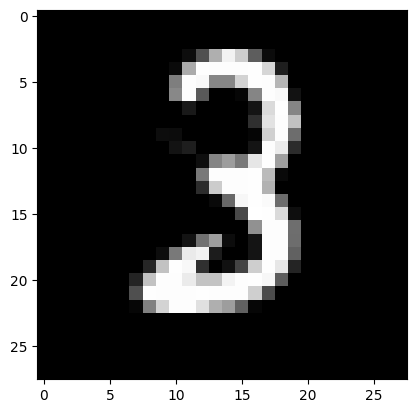

In [22]:
img = X_test.iloc[4].values.reshape((28,28))
plt.imshow(img,cmap='gray')
print("The predicted label is:" ,model.predict(X_test).argmax(axis=1)[1])